# Maquinas de Soporte Vectorial (Support Vector Machine)

In [ ]:
# Cargar librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preparar datos
from sklearn.model_selection import train_test_split # División train/test

# Modelos de Machine Learning
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Métricas (Clasificación)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Validación cruzada y ajuste de hiperparámetros
from yellowbrick.model_selection import ValidationCurve # Visualización de hiperparámetros

pd.set_option('display.max_columns', None)

In [ ]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

'1. Analisis Exploratorio.ipynb'        credit_card_default.csv
'2. Modelo de Regresion.ipynb'	        cupones.csv
 3_Regresion_Logistica.ipynb	        cupones.xlsx
 3.Regresion_Logistica_Solucion.ipynb   gastos_medicos.xlsx
 4.Arbole_Decision.ipynb	        graficas_analisis_presentacion.ipynb
 4.Arbole_Decision_Solucion.ipynb       incumplimiento_credito.csv
 5.Metodos_Ensamble.ipynb	        Modelos_Machine_Learning.ipynb
 5.Metodos_Ensamble_Solucion.ipynb      predicciones.xlsx
 6.SVM_KNN.ipynb		        publicidad.csv
 bank_marketing.csv		        Taller_Regresion_Lineal.ipynb


## Predicción de Cupones

**Contexto**

Una cadena nacional de ropa realizará una promoción por correo. Ha ordenado imprimir copias de su catálogo y en cada uno incluye un cupón de USD 50 de descuento en compras por USD 200 o más. La cadena desea enviarlo sólo a aquellos clientes que tengan mayor probabilidad de usar el cupón.
La gerencia considera que:

* La cantidad gastada anualmente por el cliente ($X_1$)
* Si posee o no una tarjeta de crédito de la tienda ($X_2$)

Son dos variables útiles para predecir si ese cliente usará el cupón.
Realiza un testeo con 32 clientes para obtener datos.

**Objetivo**

* Verificar si el gasto anual y la tenencia de una tarjeta de crédito permite explicar y predecir el uso de los cupones promocionales.
* Desarrollar un modelo de *regresión logística* que le permita predecir si un cliente utilizará o no un cupón.
* Analizar la contribución de las variables en el uso de los cupones.
* Evaluar la capacidad predictiva del modelo de regresión logística.

In [ ]:
# Cargar datos
datos = pd.read_excel("cupones.xlsx")
datos.head()

,cliente,gasto,tarjeta,cupon
0,1,2.29,1,1
1,2,3.22,1,0
2,3,2.14,1,1
3,4,3.92,0,1
4,5,2.53,1,1


In [ ]:
# Seleccionar variable Y: cupon
Y = datos['cupon']

# Seleccionar variables X: tarjeta y gasto
X = datos[['gasto','tarjeta']]

In [ ]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=777)

## Máquina de Soporte Vectorial

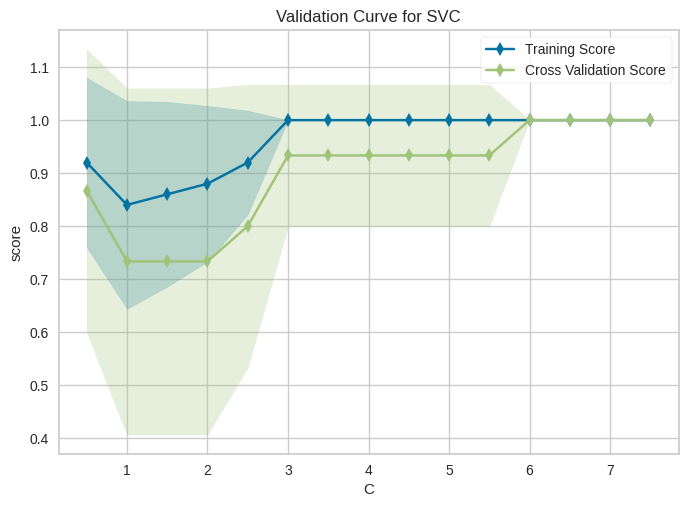

<Axes: title={'center': 'Validation Curve for SVC'}, xlabel='C', ylabel='score'>

In [ ]:
# Calibración del hiperparámetro C
curva_calibracion = ValidationCurve(
    SVC(kernel='rbf'),
    param_name='C',
    param_range=np.arange(0.5, 8, 0.5),
    cv=5,
    scoring="recall")

curva_calibracion.fit(X_train, y_train)
curva_calibracion.show()

In [ ]:
# Entrenar el clasificador
svm_clf = SVC(kernel='rbf', C=3)
svm_clf.fit(X_train, y_train)

SVC(C=3)

In [ ]:
# Generar predicciones
y_pred = svm_clf.predict(X_test)

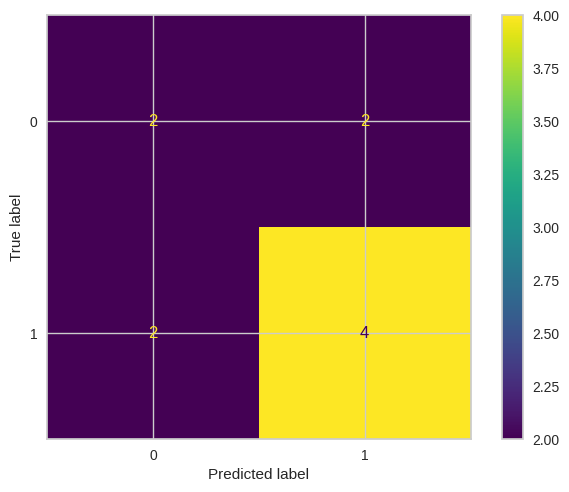

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=svm_clf.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp_cm.plot()

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



## K Vecinos mas Cercanos

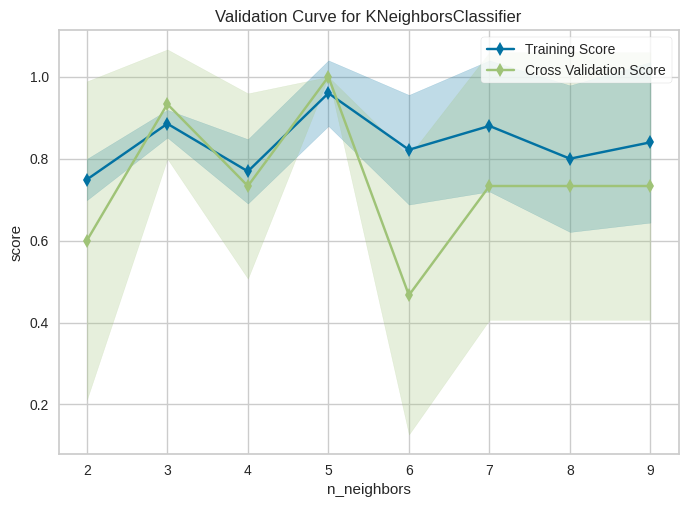

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [ ]:
# Calibrar el número de vecinos
curva_calibracion = ValidationCurve(
    KNeighborsClassifier(),
    param_name='n_neighbors',
    param_range=np.arange(2, 10, 1),
    cv=5,
    scoring="recall")

curva_calibracion.fit(X_train, y_train)
curva_calibracion.show()

In [ ]:
# Entrena el modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Generar predicciones
y_pred = knn_clf.predict(X_test)

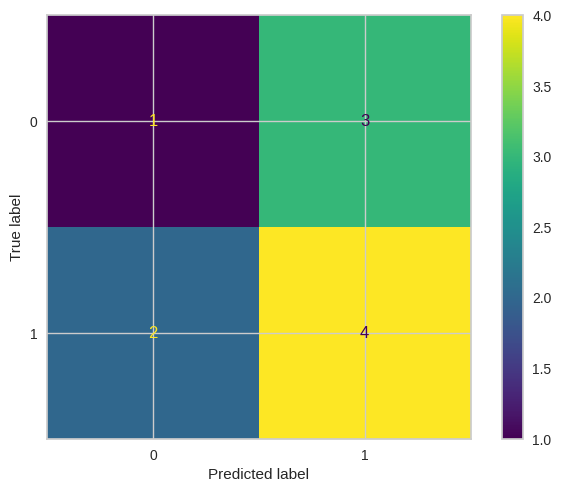

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=knn_clf.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp_cm.plot()

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.57      0.67      0.62         6

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



## Caso. Incumplimiento en pago de tarjeta de crédito

**Contexto:** Este conjunto de datos contiene información de sobre incumplimientos de pagos en creditos, y entrega información de los clientes de acuerdo a factores demográficos, datos crediticios, historial de pagos y estados de cuenta de tarjetas de crédito.

**Objetivo:** Entrenar un clasificador basado en máquinas de soporte y KNN para predecir el incumplimiento de crédito en un cliente.

**Pasos:**

1. Ajuste los hiperparámetros
2. Entre los modelos con los mejores hiperparámetros
3. Valide el modelo (matriz de confusión y reporte de clasificación)
4. Genere conclusiones del desempeño de los modelos y compare con el desempeño obtenido con los métodos de ensamble

In [ ]:
datos_credito = pd.read_csv("incumplimiento_credito.csv")
datos_credito.head()

,saldo_cuenta(millones),duracion_prestamo_meses,historial_crediticio,proposito,monto(millones),saldo_ahorros(millones),antiguedad_empleo,tasa_cuotas,estado_personal,otros_deudores,historial_residencia,propiedad,edad,plan_cuotas,vivienda,creditos_existentes,trabajo,dependientes,telefono,trabajador_extranjero,incumplimiento
0,< 1M,6,crítico,radio/televisión,1169,desconocido,> 7 años,4,hombre soltero,ninguno,4,bienes raíces,67,ninguno,propia,2,empleado calificado,1,sí,sí,0
1,1M - 10M,48,pagado,radio/televisión,5951,< 1M,1 - 4 años,2,mujer,ninguno,2,bienes raíces,22,ninguno,propia,1,empleado calificado,1,ninguno,sí,1
2,desconocido,12,crítico,educación,2096,< 1M,4 - 7 años,2,hombre soltero,ninguno,3,bienes raíces,49,ninguno,propia,1,residente no calificado,2,ninguno,sí,0
3,< 1M,42,pagado,muebles,7882,< 1M,4 - 7 años,2,hombre soltero,aval,4,sociedad de ahorros y préstamos,45,ninguno,gratuita,1,empleado calificado,2,ninguno,sí,0
4,< 1M,24,retrasado,coche (nuevo),4870,< 1M,1 - 4 años,3,hombre soltero,ninguno,4,desconocido/nada,53,ninguno,gratuita,2,empleado calificado,2,ninguno,sí,1


### Preparar los datos

In [ ]:
# Divida variables independientes Xs y variable dependiente y


# Cree las variables dummies


# Dividir los datos en cojunto de entrenamiento y prueba



### Maquina de Soporte Vectorial

In [ ]:
# Ajuste de hiperparámetros: C entre 0.5 y 8 con incrementos en 0.5
# Utilice la función ValidationCurve()
# En esta función utilice la métrica: recall





In [ ]:
# Entrenar el modelo de máquina de soporte vectorial



In [ ]:
# Generar predicciones


In [ ]:
# Matriz de confusión



In [1]:
# Metricas (Accuracy, Recall, Precision, F1-Score)


# Imprimir metricas


### K vecinos mas cercanos

In [ ]:
# Ajuste de hiperparámetros: n_neighbors entre 2 y 20
# Utilice la función ValidationCurve()
# En esta función utilice la métrica: recall




In [ ]:
# Configurar modelo

# Entrenar modelo


In [ ]:
# Generar predicciones


In [ ]:
# Matriz de confusión



In [ ]:
# Metricas


# Imprimir metricas




### Comparación entre modelos

Trate de construir una tabla con las métricas de cada modelo: regresión logística, arboles, random forest, gradient boosting, svm y knn. También haga una gráfica e identifique el modelo(s) que genera un mejor desempeño.